# Import Libraries

In [44]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
pwd = os.getcwd() 
filepath = pwd + "/android-games.csv"
df = pd.read_csv(filepath)

## Viewing the Dataset
 lets read and check our dataset

In [18]:
print ('Data shape is: ', df.shape)

Data shape is:  (1730, 15)


* so we have 1730 rows and 15 columns working with
* lets take a look at the columns and general summary info.

In [17]:
pd.DataFrame({"Columns": df.columns})

,Columns
0,rank
1,title
2,total ratings
3,installs
4,average rating
5,growth (30 days)
6,growth (60 days)
7,price
8,category
9,5 star ratings


In [20]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

Great there are no missing vlaues within this dataset. That saves us some time from dealing with NAN's.
* Lets sample our dataset to explore what it contains.
* lets sample the first 5 rows.

In [25]:
df.sample(n=8)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1552,27,Can you escape the 100 room IV,166160,5.0 M,4,1.2,2.4,0.0,GAME TRIVIA,117768,29132,11301,2815,5141,False
821,96,Animals Farm For Kids,51687,5.0 M,4,0.1,0.2,0.0,GAME EDUCATIONAL,41659,5118,1929,609,2369,False
52,53,DINO HUNTER: DEADLY SHORES,1495507,50.0 M,4,0.1,0.2,0.0,GAME ACTION,1096349,179585,80390,29979,109201,False
116,17,June's Journey: Hidden Objects,830121,10.0 M,4,1.9,4.0,0.0,GAME ADVENTURE,580582,143752,41142,16642,48000,False
970,45,Mouse,685364,10.0 M,4,169.9,0.0,0.0,GAME PUZZLE,463196,120923,48379,19969,32895,False
595,70,Bingo Journey - Lucky & Fun Casino Bingo Games,138883,1.0 M,4,2.4,4.7,0.0,GAME CASINO,103586,18665,8883,2911,4835,False
1475,50,Heroes Evolved,544851,10.0 M,3,0.3,0.6,0.0,GAME STRATEGY,292552,45804,41854,27186,137452,False
772,47,My Town : Fashion Show,88278,10.0 M,4,2.7,6.0,0.0,GAME EDUCATIONAL,62679,6818,4119,3682,10977,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


The install column can be useful for analysis. However note that it's a type object.
It may be more useful if it were an *integer (int)* or *float*.
*  May need to reformat this later on.

# Summary so far: 
*   The dataset consists of games from different categories, ratings and number of installs.
*   there are no NAN / null values.
*   **installs** can be useful for analysis. It would be good to reformat it to a numerical variable.
* **category** is a categorical variable, making it useful for groupings.
* numerical varibles should be paid close attentions to.
* should some columns be dropped ?

In [26]:
df['price'].value_counts()

0.00    1723
1.99       3
7.49       1
2.99       1
1.49       1
0.99       1
Name: price, dtype: int64

In [27]:
df['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

## Dropping Price column
we can drop the price column since most games are free and only 7 aren't, also the price of a game isn't relevant to the EDA.

In [28]:
df.drop('price', axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   category          1730 non-null   object 
 8   5 star ratings    1730 non-null   int64  
 9   4 star ratings    1730 non-null   int64  
 10  3 star ratings    1730 non-null   int64  
 11  2 star ratings    1730 non-null   int64  
 12  1 star ratings    1730 non-null   int64  
 13  paid              1730 non-null   bool   
dtypes: bool(1), float64(2), int64(8), object(3)
memory usage: 177.5+ KB


## Categories

In [43]:
df['category'].value_counts()

GAME CARD            126
GAME WORD            104
GAME PUZZLE          100
GAME TRIVIA          100
GAME STRATEGY        100
GAME SPORTS          100
GAME SIMULATION      100
GAME ROLE PLAYING    100
GAME RACING          100
GAME ACTION          100
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME CASUAL          100
GAME CASINO          100
GAME BOARD           100
GAME ARCADE          100
GAME MUSIC           100
Name: category, dtype: int64

<AxesSubplot:title={'center':'Game Categories'}>

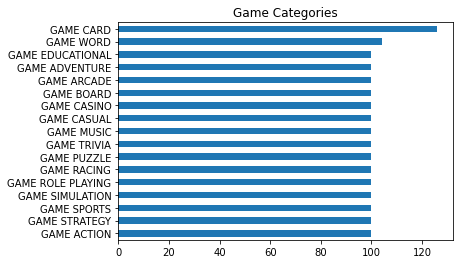

In [40]:
df['category'].value_counts(ascending=True).plot(kind='barh', title='Game Categories')

C:\Users\ro-ja\anaconda3\envs\demo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '# of games')

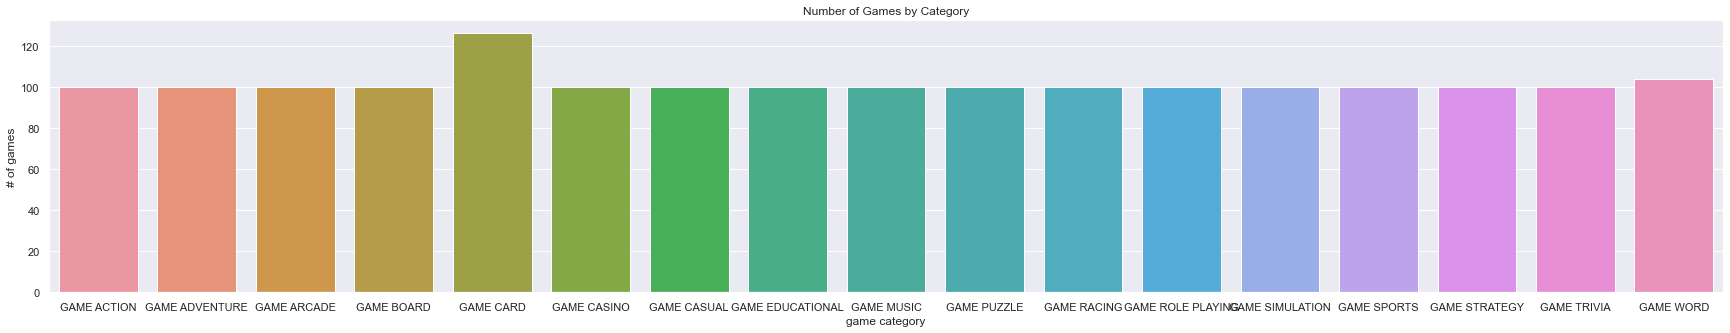

In [61]:
plt.figure(figsize=(30,5))
sns.set_theme(style="darkgrid")
sns.countplot(df['category'])
plt.title('Number of Games by Category')
plt.xlabel('game category')
plt.ylabel('# of games')